In [1]:
import pandas as pd
import altair as alt
from datetime import datetime

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

In [3]:
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
fraudPD.shape

(590540, 394)

In [5]:
fraudPD.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

In [60]:
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [66]:
fraudPD.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,time
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Thursday, July 02, 1970 04:57:27"
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,F,F,M0,F,T,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [6]:
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']
transGroup

,isFraud,count
0,0,569877
1,1,20663


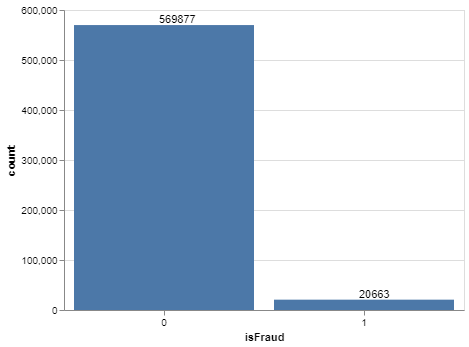

In [7]:
bar_chart=alt.Chart(transGroup).mark_bar().encode(alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [8]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']
productCDGroup

,ProductCD,count
0,C,68519
1,H,33024
2,R,37699
3,S,11628
4,W,439670


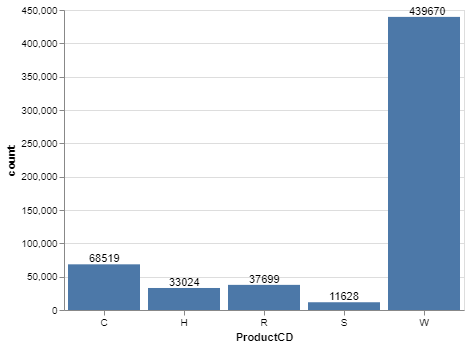

In [9]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [10]:
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']
card4Group

,card4,count
0,american express,8328
1,discover,6651
2,mastercard,189217
3,visa,384767
4,NaN,1577


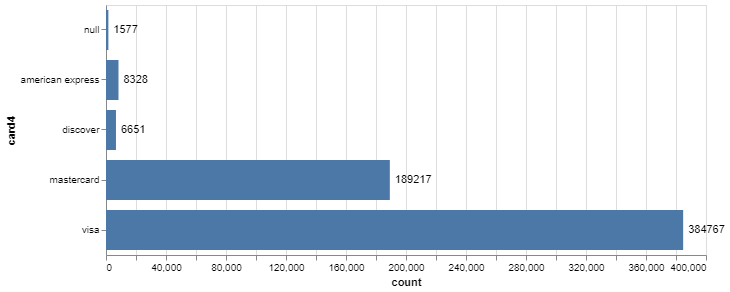

In [11]:
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(x='count:Q',y='card4:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [69]:
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']
card6Group

,card6,count
0,charge card,15
1,credit,148986
2,debit,439938
3,debit or credit,30
4,NaN,1571


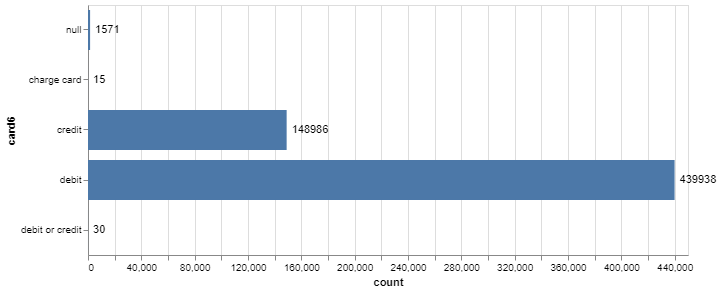

In [70]:
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(x='count:Q',y='card6:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [12]:
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']
card4Group

,card4,isFraud,count
0,american express,0,8089
1,american express,1,239
2,discover,0,6137
3,discover,1,514
4,mastercard,0,182721
5,mastercard,1,6496
6,visa,0,371394
7,visa,1,13373
8,NaN,0,1536
9,NaN,1,41


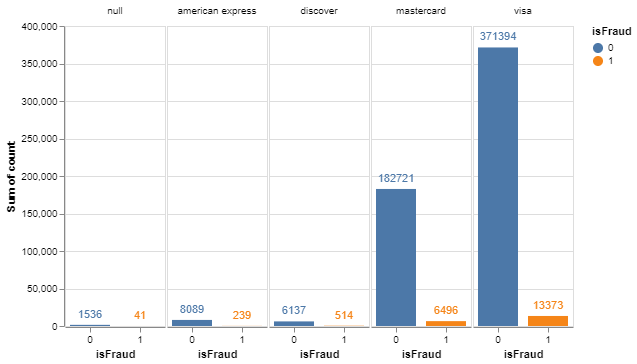

In [13]:
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title=None)
).configure_facet(spacing=0)


In [72]:
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']
card6Group

,card6,isFraud,count
0,charge card,0,15
1,credit,0,139036
2,credit,1,9950
3,debit,0,429264
4,debit,1,10674
5,debit or credit,0,30
6,NaN,0,1532
7,NaN,1,39


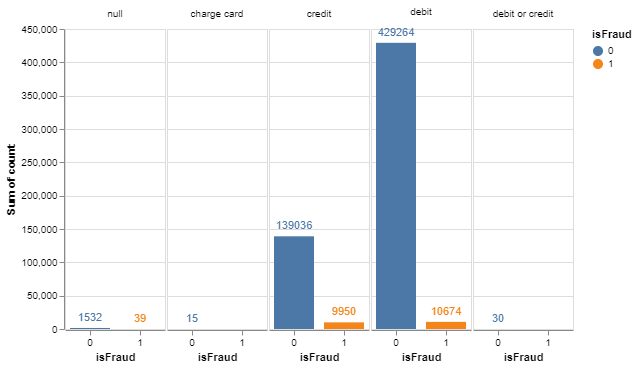

In [73]:
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title=None)
).configure_facet(spacing=0)

In [84]:
fraudPD[['card1','card2','card3','card4','card5','card6']].value_counts()

card1  card2  card3  card4       card5  card6 
9500   321.0  150.0  visa        226.0  debit     14112
15885  545.0  185.0  visa        138.0  debit     10332
17188  321.0  150.0  visa        226.0  debit     10312
7919   194.0  150.0  mastercard  166.0  debit      8844
15066  170.0  150.0  mastercard  102.0  credit     7918
                                                  ...  
10076  555.0  150.0  mastercard  182.0  debit         1
10071  555.0  150.0  visa        226.0  debit         1
10068  555.0  160.0  visa        138.0  debit         1
10058  490.0  150.0  mastercard  117.0  debit         1
18396  111.0  150.0  visa        226.0  debit         1
Length: 13691, dtype: int64

In [23]:
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

In [24]:
tAmountdf

,isFraud,TransactionAmt
0,0,134.511665
1,1,149.244779


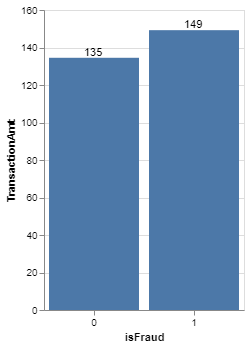

In [39]:
bar_chart=alt.Chart(tAmountdf).mark_bar().encode(
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)),
    y='TransactionAmt:Q')

bar_text = bar_chart.mark_text(align='left', baseline='bottom', dx=-10).encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(bar_chart + bar_text).properties(width=200)

In [87]:
fraudPD[['TransactionID','P_emaildomain','R_emaildomain']].value_counts()

P_emaildomain  R_emaildomain
gmail.com      gmail.com        44429
hotmail.com    hotmail.com      25570
anonymous.com  anonymous.com    13948
yahoo.com      yahoo.com         5550
gmail.com      anonymous.com     2470
                                ...  
msn.com        ymail.com            1
netzero.com    anonymous.com        1
               comcast.net          1
               gmail.com            1
hotmail.de     gmail.com            1
Length: 650, dtype: int64

In [111]:
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
        id_vars=['TransactionID'], 
        value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)
fraudMelt

,TransactionID,variable,value
0,2987000,P_emaildomain,NaN
1,2987001,P_emaildomain,gmail.com
2,2987002,P_emaildomain,outlook.com
3,2987003,P_emaildomain,yahoo.com
4,2987004,P_emaildomain,gmail.com
...,...,...,...
590535,3577535,R_emaildomain,NaN
590536,3577536,R_emaildomain,NaN
590537,3577537,R_emaildomain,NaN
590538,3577538,R_emaildomain,NaN


In [112]:
fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['stakeholder','domain','count']
fraudMelt

,stakeholder,domain,count
0,P_emaildomain,gmail.com,228355
1,P_emaildomain,yahoo.com,100934
2,R_emaildomain,gmail.com,57147
3,P_emaildomain,hotmail.com,45250
4,P_emaildomain,anonymous.com,36998
...,...,...,...
114,R_emaildomain,frontiernet.net,14
115,R_emaildomain,netzero.com,14
116,R_emaildomain,centurylink.net,12
117,R_emaildomain,netzero.net,9


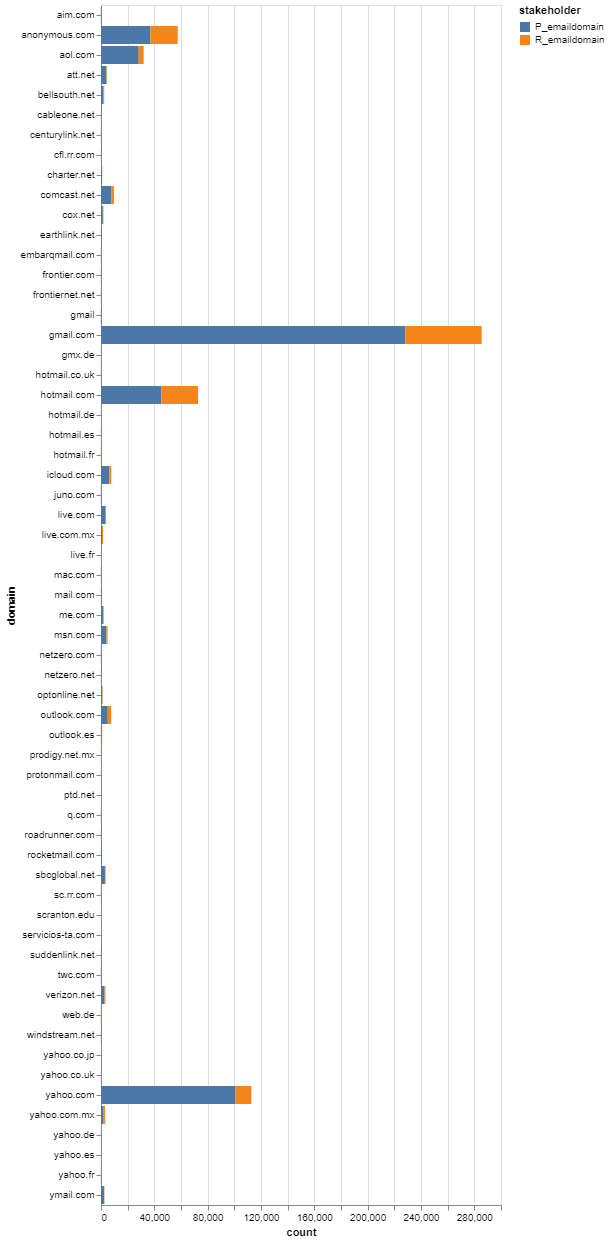

In [114]:
alt.Chart(fraudMelt[['stakeholder','domain','count']]).mark_bar().encode(x='count', y='domain', color='stakeholder')